In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
import pandas as pd

In [4]:
# 1. Import the data.
df = pd.read_csv('/content/gdrive/MyDrive/ECON441B/insurance.csv')

In [22]:
df.loc[df['sex'] == 'female', 'sex']= 1.
df.loc[df['sex'] == 'male', 'sex']= 0.

df.loc[df['smoker'] == 'no', 'smoker']= 0.
df.loc[df['smoker'] == 'yes', 'smoker']= 1.

df.loc[df['region'] == 'southwest', 'region']= 0
df.loc[df['region'] == 'southeast', 'region']= 1
df.loc[df['region'] == 'northwest', 'region']= 2
df.loc[df['region'] == 'northeast', 'region']= 3



In [6]:
import numpy as np

In [24]:
data = np.array(df.iloc[:, :-1]) 
target = np.array(df.iloc[:, -1])

In [29]:
cut = int((len(data) * .8) //1)

In [30]:
# 2. Split the data in to 80/20.
in_data = data[:cut]
out_data = data[cut:]

in_target = target[:cut]
out_target = target[cut:]

In [33]:


from sklearn import preprocessing

In [35]:
# 3. Normalize the data
scaler = preprocessing.StandardScaler().fit(in_data)
in_data_scale = scaler.transform(in_data)

out_data_scale = scaler.transform(out_data)


In [71]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
# 4. Get lambda.

modCV = LassoCV().fit(in_data_scale, in_target)

a = modCV.alpha_


In [52]:
# 5. Run a lambda regression.
mod1 = Lasso(alpha = a).fit(in_data_scale, in_target)

In [53]:
mod1.coef_

array([3564.26137833,    0.        , 1890.8527485 ,  398.24050447,
       9324.84227138,  326.52198757])

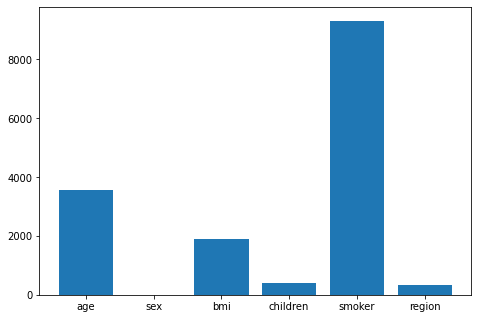

In [68]:
# 6. Plot the coefficients.
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df.columns[:-1], mod1.coef_)
plt.show()

7. Interpret the coefficients. 
It appears that whether the respondent is a smoker has the strongest impact on the charge. On average, a smoker is charged $9324 more than a non-smoker. Age and bmi also seem to have stronger impact, as well. The coefficient for sex is reduced to 0, suggesting that it is less important to the amount of insurance charge.

In [64]:
in_predict = mod1.predict(np.array(in_data_scale))
out_predict = mod1.predict(np.array(out_data_scale))


In [66]:
# 8. Compare the in and out of sample MSE.
in_MSE = np.square(np.subtract(in_target,in_predict)).mean()
out_MSE = np.square(np.subtract(out_target,out_predict)).mean()
print(in_MSE)
print(out_MSE)
# The out-of-sample MSE is slightly larger than the in-sample MSE. 

36490415.101693384
37252730.724018715
